In [1]:
import matplotlib.pyplot as plt
import numpy as np
from robust_regression.sweeps.eps_delta_out_sweeps import (
    sweep_eps_delta_out_optimal_lambda_fixed_point,
    sweep_eps_delta_out_optimal_lambda_hub_param_fixed_point,
)
from tqdm.auto import tqdm
from robust_regression.fixed_point_equations.fpe_Huber_loss import var_hat_func_Huber_decorrelated_noise
from robust_regression.fixed_point_equations.fpe_L2_loss import var_hat_func_L2_decorrelated_noise
from robust_regression.fixed_point_equations.fpe_L2_regularization import var_func_L2
from robust_regression.aux_functions.misc import estimation_error, excess_gen_error, gen_error_BO, angle_teacher_student

In [2]:
def sigma_order_param(m, q, sigma):
    return sigma


def q_order_param(m, q, sigma):
    return q


def m_order_param(m, q, sigma):
    return m

In [7]:
delta_in, beta = 1.0, 0.0
eps_min, eps_max, n_eps_pts = 1e-3, 0.99, 20
delta_out_min, delta_out_max, n_delta_out_pts = 1e-2, 1e2, 20

alphas = [1.0, 10.0, 100.0]
colors = ["r", "g", "b"]

  0%|          | 0/3 [00:00<?, ?it/s]

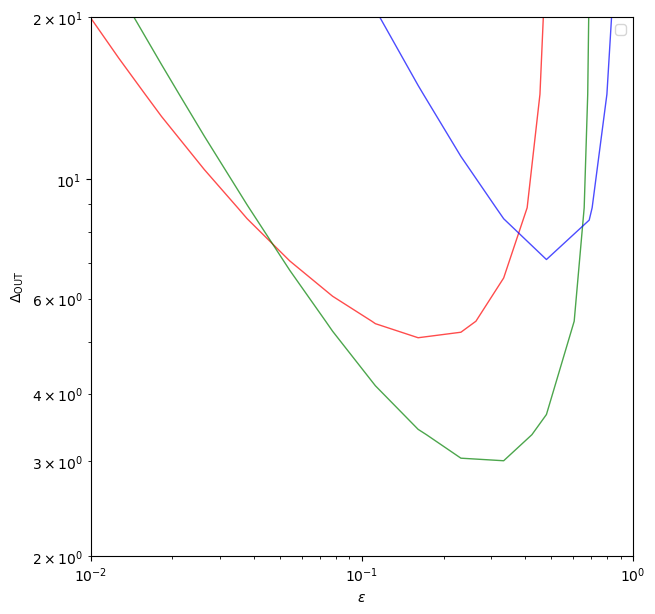

In [8]:
plt.figure(figsize=(7, 7))

for alpha, c in zip(tqdm(alphas), colors):
    (
        epsilons_l2,
        delta_out_l2,
        f_min_vals_l2,
        reg_params_opt_l2,
        (ms_l2, qs_l2, sigmas_l2),
    ) = sweep_eps_delta_out_optimal_lambda_fixed_point(
        var_func_L2,
        var_hat_func_L2_decorrelated_noise,
        eps_min,
        eps_max,
        n_eps_pts,
        delta_out_min,
        delta_out_max,
        n_delta_out_pts,
        {"reg_param": 3.0},
        {"alpha": alpha, "delta_in": delta_in, "delta_out": 10.0, "percentage": 0.3, "beta": beta},
        delta_in,
        (0.6, 0.01, 0.9),
        funs=[m_order_param, q_order_param, sigma_order_param],
        funs_args=[{}, {}, {}],
        update_funs_args=None,
        f_min=excess_gen_error,
        f_min_args={"delta_in": delta_in, "delta_out": 10.0, "percentage": 0.3, "beta": beta},
        update_f_min_args=True,
        min_reg_param=1e-5,
    )

    (
        epsilons_hub,
        delta_out_hub,
        f_min_vals_hub,
        (reg_params_opt_hub, huber_params_opt),
        (ms_hub, qs_hub, sigmas_hub),
    ) = sweep_eps_delta_out_optimal_lambda_hub_param_fixed_point(
        var_func_L2,
        var_hat_func_Huber_decorrelated_noise,
        eps_min,
        eps_max,
        n_eps_pts,
        delta_out_min,
        delta_out_max,
        n_delta_out_pts,
        {"reg_param": 3.0},
        {"alpha": alpha, "delta_in": delta_in, "delta_out": 10.0, "percentage": 0.3, "beta": beta, "a": 1.0},
        delta_in,
        1.0,
        (0.6, 0.01, 0.9),
        funs=[m_order_param, q_order_param, sigma_order_param],
        funs_args=[{}, {}, {}],
        update_funs_args=None,
        f_min=excess_gen_error,
        f_min_args={"delta_in": delta_in, "delta_out": 10.0, "percentage": 0.3, "beta": beta},
        update_f_min_args=True,
        min_reg_param=1e-5,
    )

    difference_hub_l2 = f_min_vals_l2 - f_min_vals_hub

    plt.contour(
        epsilons_hub,
        delta_out_hub,
        difference_hub_l2,
        levels=[0.02],
        colors=c,
        alpha=0.7,
        linewidths=1.0,
    )

plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\Delta_{\mathrm{OUT}}$")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-2, 1])
plt.ylim([2, 20])
plt.legend([r"$\alpha = 1$", r"$\alpha = 10$", r"$\alpha = 100$"], loc="upper right", handlelength=1.0)

plt.show()